In [1]:
import tensorflow as tf
import numpy as np
import random

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','bag','Ankle boot']
class_num=len(class_names)

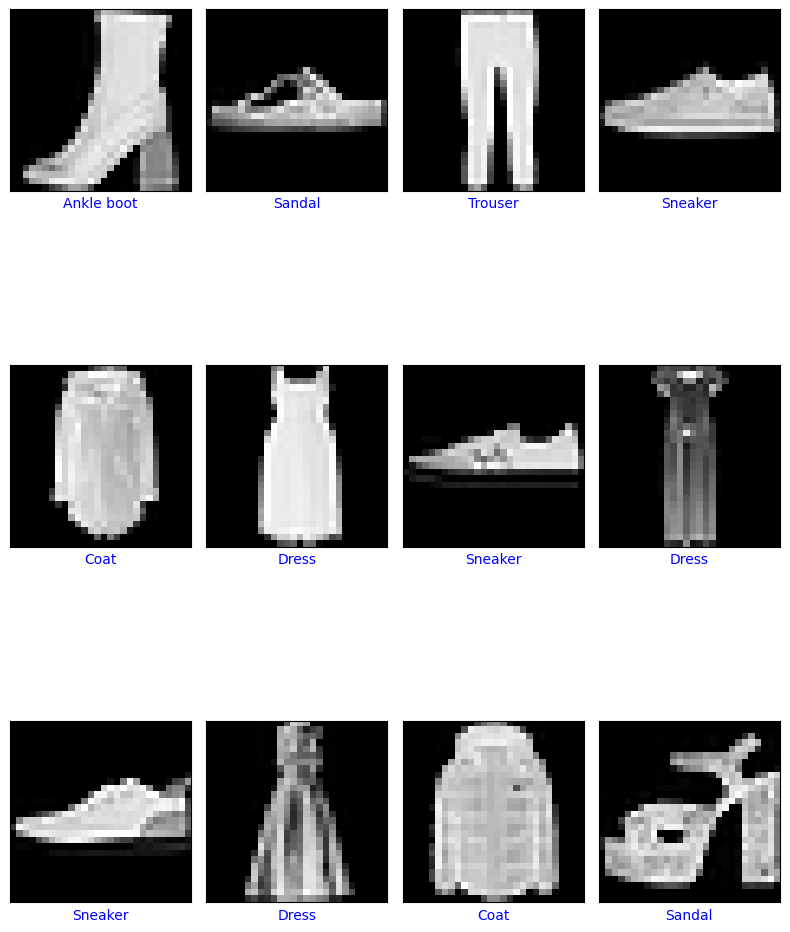

In [6]:
def plot_data(x_data:np.array,y_data:np.array):
    nrows,ncols=3,4
    len_x=x_data.shape[0]
    fig,pics=plt.subplots(nrows,ncols,figsize=(8,12))
    for itr in range(nrows*ncols):
        pic=pics[itr//ncols,itr%ncols]
        pic_idx=random.randint(0,len_x)
        pic.imshow(x_data[pic_idx],cmap='gray')
        pic.set(xticks=[],yticks=[])
        name=class_names[y_data[pic_idx]]
        pic.set_xlabel(name,color='blue',fontsize=10)
    plt.tight_layout()
    plt.show()
plot_data(x_train,y_train)    

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255


In [9]:
x_train=np.expand_dims(x_train,axis=-1)
x_train.shape


(60000, 28, 28, 1)

In [10]:

y_train_label = keras.utils.to_categorical(y_train, class_num)
y_test_label = keras.utils.to_categorical(y_test, class_num)

In [11]:

model=keras.models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(class_num,activation='softmax')
                 ])


C:\Users\thispc\Pictures\thaio\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train_label,
                  epochs=10,
                  batch_size=256,
                  validation_split=0.1
                 )

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6930 - loss: 0.8735 - val_accuracy: 0.8168 - val_loss: 0.4949
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8384 - loss: 0.4382 - val_accuracy: 0.8628 - val_loss: 0.3746
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8628 - loss: 0.3681 - val_accuracy: 0.8737 - val_loss: 0.3494
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8735 - loss: 0.3345 - val_accuracy: 0.8702 - val_loss: 0.3432
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8840 - loss: 0.3110 - val_accuracy: 0.8560 - val_loss: 0.4109
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8930 - loss: 0.2852 - val_accuracy: 0.8862 - val_loss: 0.3082
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8960 - loss: 0.2752 - val_accuracy: 0.8798 - val_loss: 0.3265
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9021 - loss: 0.2578 - val_accu

In [14]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
train_loss,val_loss=history_dict['loss'],history_dict['val_loss']
train_acc,val_acc=history_dict['accuracy'],history_dict['val_accuracy']

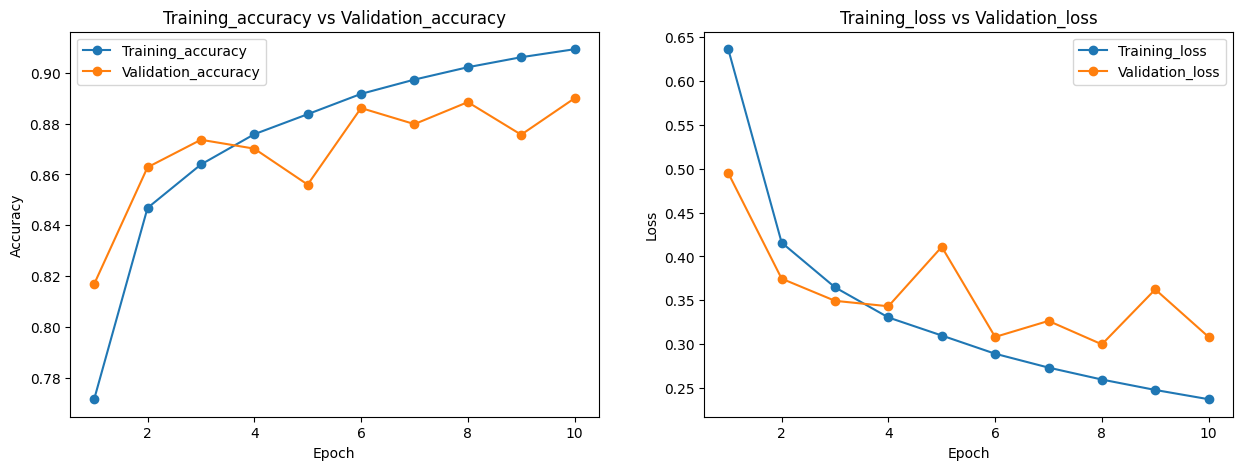

In [16]:
fig,(pic_1,pic_2)=plt.subplots(1,2,figsize=(15,5))
epochs=10
epoch_run=[i+1 for i in range(epochs)]
pic_1.plot(epoch_run,train_acc,label='Training_accuracy',marker='o')
pic_1.plot(epoch_run,val_acc,label='Validation_accuracy',marker='o')
pic_1.set(title='Training_accuracy vs Validation_accuracy',xlabel='Epoch',ylabel='Accuracy')
pic_1.legend()

pic_2.plot(epoch_run,train_loss,label='Training_loss',marker='o')
pic_2.plot(epoch_run,val_loss,label='Validation_loss',marker='o')
pic_2.set(title='Training_loss vs Validation_loss',xlabel='Epoch',ylabel='Loss')
pic_2.legend()

plt.show()

In [25]:
p=model.predict(x_test)
pre=np.argmax(p, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pre,y_test))

0.8841


In [30]:
x_sample = x_test[0:10]
y_predict = p[0:10]

In [31]:

predictions = np.argmax(y_predict, axis = 1)
predictions

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

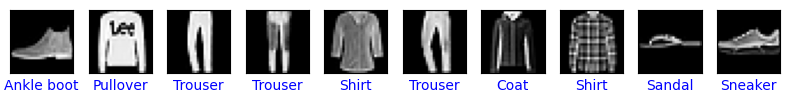

In [32]:
def plot_predict_data(x_data,y_data):
    num=x_data.shape[0]
    fig,pics=plt.subplots(1,num,figsize=(8,12))
    for itr in range(num):
        pic=pics[itr]
        pic.imshow(x_data[itr],cmap='gray')
        pic.set(xticks=[],yticks=[])
        name=class_names[y_data[itr]]
        pic.set_xlabel(name,color='blue',fontsize=10)
    plt.tight_layout()
    plt.show()
plot_predict_data(x_sample,predictions)